## Load MNIST on Python 3.x

In [1]:
import pickle
import gzip

In [2]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
f.close()

In [3]:
x_train,y_train = training_data
x_test, y_test = test_data
x_val, y_val = validation_data

## Load USPS on Python 3.x

In [4]:
from PIL import Image
import os
import numpy as np

In [5]:
USPSMat  = []
USPSTar  = []
curPath  = 'USPSdata/USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)

# 1. Neural Network

In [6]:
# Neural Network 
import keras 
from keras.datasets import mnist 
from keras.layers import Dense 
from keras.models import Sequential 
#(x_train, y_train), (x_test, y_test) = mnist.load_data()  
num_classes=10  
image_vector_size=28*28  

x_train = x_train.reshape(x_train.shape[0], image_vector_size)  
x_test = x_test.reshape(x_test.shape[0], image_vector_size)  
y_train = keras.utils.to_categorical(y_train, num_classes)  
y_test = keras.utils.to_categorical(y_test, num_classes) 
image_size = 784 
model = Sequential()  
#model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,))) 
model.add(Dense(units=32, activation='relu', input_shape=(image_size,))) 
#model.add(Dense(units=num_classes, activation='softmax'))  
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax')) 
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])  
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=False,validation_split=.1)  
loss,accuracy = model.evaluate(x_test, y_test, verbose=False) 

Using TensorFlow backend.


### 1.1Prediction for MNIST test data

In [7]:
y_prob_nw_mnist = model.predict(x_test, batch_size=32, verbose=0, steps=None)

In [8]:
y_prob_nw_mnist.shape

(10000, 10)

In [9]:
y_pred_nw_mnist = np.argmax(y_prob_nw_mnist,axis=1)

In [10]:
y_pred_nw_mnist.shape

(10000,)

In [11]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_nw_mnist)

print("Confusion Matrix for MNIST data with Neural Network:")
print(" ")
print(cm)

Confusion Matrix for MNIST data with Neural Network:
 
[[ 953    0    2    2    0    9   10    1    3    0]
 [   0 1111    2    2    0    2    3    1   14    0]
 [  14    6  899   18   15    1   14   18   43    4]
 [   2    1   14  923    1   30    2   14   15    8]
 [   1    1    2    1  903    0   14    2    7   51]
 [   8    3    3   44   11  766   16    8   27    6]
 [  13    3    4    1   21   14  898    1    3    0]
 [   5   11   18    7    7    1    0  953    3   23]
 [  10    9    3   24   12   24   14   11  846   21]
 [  12    5    2    9   33   10    0   19    6  913]]


In [12]:
np.sum(cm)

10000

In [13]:
np.sum(np.diagonal(cm))

9165

In [14]:
np.trace(cm)

9165

In [15]:
# Calculate accuracy with given confusion matrix
def calcAccWithCM(cm):
    return np.trace(cm)/np.sum(cm)*100

In [16]:
print("Accuracy for MNIST data with Neural Network:")
print(calcAccWithCM(cm))

Accuracy for MNIST data with Neural Network:
91.64999999999999


In [17]:
np.argmax(y_test, axis=1).shape

(10000,)

In [18]:
y_pred_nw_mnist

array([7, 2, 1, ..., 4, 5, 6])

### 1.2 Prection for Neural network using USPS

In [19]:
USPSdata = np.asarray(USPSMat)

In [20]:
np.transpose(USPSdata)
y_prob_nw_USPS = model.predict(USPSdata, batch_size=32, verbose=0, steps=None)

In [21]:
cm = confusion_matrix(USPSTar, np.argmax(y_prob_nw_USPS, axis=1))

In [22]:
print(cm)

[[ 577    2  254  104  350  184   80   62   69  318]
 [ 143  353  178  373  220  105   17  466  127   18]
 [ 207   22 1120  202   47  154   79   75   71   22]
 [  45    4   90 1441    9  237    9   80   65   20]
 [  35   39   27   63 1093  180   48  214  145  156]
 [ 155   22  161  244   55 1100  123   80   42   18]
 [ 384   12  296  113   97  224  766   17   56   35]
 [ 141  230  215  587   48  167   15  403  157   37]
 [ 174   20  101  255  139  719  123   49  367   53]
 [  38  128   97  480  155  129    9  473  252  239]]


In [23]:
print("Accuracy for USPS data with Neural Network:")
print(calcAccWithCM(cm))

Accuracy for USPS data with Neural Network:
37.29686484324216


# 2. SVM 

In [24]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
f.close()

In [25]:
x_train,y_train = training_data
x_test, y_test = test_data
x_val, y_val = validation_data

In [26]:
# SVM & RandomForest
import numpy as np
from sklearn.svm import SVC  
from sklearn.datasets import fetch_mldata
#mnist = fetch_mldata('MNIST original')  
#n_train = 60000  
#n_test = 10000  
#indices = arange(len(mnist.data))  
#train_idx = arange(0,n_train)  
#test_idx = arange(n_train+1,n_train+n_test)  
#X_train, y_train = mnist.data[train_idx], mnist.target[train_idx] 
#X_test, y_test = mnist.data[test_idx], mnist.target[test_idx]  

# SVM  
#classifier1 = SVC(kernel='rbf', C=2, gamma = 0.05); 
#classifier1 = SVC(kernel='linear'); 
#classifier1 = SVC(kernel='rbf', gamma = 1); 
classifier1 = SVC(kernel='rbf'); 
classifier1.fit(x_train, y_train)  
  

/home/baskar/Environments/env1/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### 2.1 Prediction for MNIST test data

In [27]:
y_pred_svm_mnist = classifier1.predict(x_test)

In [28]:
y_pred_svm_mnist

array([7, 2, 1, ..., 4, 5, 6])

In [29]:
cm_svm_mnist = confusion_matrix(y_test,y_pred_svm_mnist)

In [30]:
print("Confusion Matrix for MNIST test data with SVM:")
print(" ")
print(cm_svm_mnist)

Confusion Matrix for MNIST test data with SVM:
 
[[ 967    0    1    0    0    5    4    1    2    0]
 [   0 1120    2    3    0    1    3    1    5    0]
 [   9    1  962    7   10    1   13   11   16    2]
 [   1    1   14  950    1   17    1   10   11    4]
 [   1    1    7    0  937    0    7    2    2   25]
 [   7    4    5   33    7  808   11    2   10    5]
 [  10    3    4    1    5   10  924    0    1    0]
 [   2   13   22    5    7    1    0  954    4   20]
 [   4    6    6   14    8   24   10    8  891    3]
 [  10    6    0   12   33    5    1   14    6  922]]


In [31]:
print("Accuracy for MNIST test data with SVM:")
print(calcAccWithCM(cm_svm_mnist))

Accuracy for MNIST test data with SVM:
94.35


### 2.2 Prediction for USPS data

In [32]:
y_pred_svm_USPS = classifier1.predict(USPSMat)

In [33]:
y_pred_svm_USPS

array([0, 0, 0, ..., 9, 7, 3])

In [34]:
cm_svm_usps = confusion_matrix(USPSTar, y_pred_svm_USPS)

In [35]:
print("Confusion Matrix for USPS data with SVM:")
print(" ")
print(cm_svm_usps)

Confusion Matrix for USPS data with SVM:
 
[[ 573    2  428   19  285  248   73   44    6  322]
 [ 110  429  285  137  273  180   46  501   22   17]
 [ 128   18 1402   59   39  198   61   57   23   14]
 [  76    3  186 1123   11  483    5   70   27   16]
 [  18   67   91   14 1167  267   22  194   69   91]
 [ 108   17  257  102   25 1367   60   43   15    6]
 [ 197    7  489   24   98  394  748   13    7   23]
 [  50  225  457  265   57  416   15  452   41   22]
 [  73   25  209  193   87 1006   95   41  244   27]
 [  26  166  228  278  213  165    8  499  214  203]]


In [36]:
print("Accuracy for USPS data with SVM:")
print(calcAccWithCM(cm_svm_usps))

Accuracy for USPS data with SVM:
38.54192709635482


# 3. Random Forest

In [37]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
f.close()

In [38]:
x_train,y_train = training_data
x_test, y_test = test_data
x_val, y_val = validation_data

In [39]:
from sklearn.ensemble import RandomForestClassifier
#RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators=100); 
classifier2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### 3.1 Prediction for MNIST test data

In [40]:
y_pred_rm_mnist = classifier2.predict(x_test)

In [41]:
y_pred_rm_mnist

array([7, 2, 1, ..., 4, 5, 6])

In [42]:
cm_rm_mnist = confusion_matrix(y_test,y_pred_rm_mnist)

In [43]:
print("Confusion Matrix for MNIST test data with Random Forest:")
print(" ")
print(cm_rm_mnist)

Confusion Matrix for MNIST test data with Random Forest:
 
[[ 971    1    0    0    0    1    3    1    3    0]
 [   0 1121    3    3    0    3    2    0    2    1]
 [   7    0  997    5    2    1    4    9    7    0]
 [   0    0    8  974    0    9    0   10    7    2]
 [   0    0    1    0  953    0    5    1    3   19]
 [   3    1    1   17    2  853    6    1    5    3]
 [   7    3    1    0    3    4  936    0    4    0]
 [   1    4   18    1    1    0    0  986    4   13]
 [   6    0    3    4    4    7    4    4  931   11]
 [   6    5    1   12   12    6    1    4    6  956]]


In [44]:
print("Accuracy for MNIST test data with Random Forest:")
print(calcAccWithCM(cm_rm_mnist))

Accuracy for MNIST test data with Random Forest:
96.78


### 3.2 Prediction for USPS data

In [45]:
y_pred_rm_usps = classifier2.predict(USPSMat)

In [46]:
cm_rm_usps = confusion_matrix(USPSTar, y_pred_rm_usps)

In [47]:
print("Confusion Matrix for USPS data with Random Forest:")
print(" ")
print(cm_rm_usps)

Confusion Matrix for USPS data with Random Forest:
 
[[ 622    9  266   50  464  141   83  121    4  240]
 [  36  565  114  100   34   91   26 1015   17    2]
 [  82   30 1283   84   55  141   27  289    7    1]
 [  37   10  113 1256   51  312    3  198    5   15]
 [  11  210   66   32 1027  174   16  412   32   20]
 [ 136   35  140  121   43 1334   39  134    5   13]
 [ 275   48  252   39   94  328  782  160   11   11]
 [  28  357  353  271   32  220   30  693    7    9]
 [  41   51  165  241  117 1022   77   97  161   28]
 [  14  270  235  300  238  127   14  620   78  104]]


In [48]:
print("Accuracy for USPS data with Random Forest:")
print(calcAccWithCM(cm_rm_usps))

Accuracy for USPS data with Random Forest:
39.13695684784239


# 4. Logistic Regression

In [49]:
import numpy as np
import scipy.sparse

In [50]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
f.close()

In [51]:
x,y = training_data
x_test,y_test = test_data

In [52]:
def getLoss(w,x,y,lam):
    m = x.shape[0] #First we get the number of training examples
    y_mat = oneHotIt(y) #Next we convert the integer class coding into a one-hot representation
    scores = np.dot(x,w) #Then we compute raw class scores given our input and current weights
    prob = softmax(scores) #Next we perform a softmax on these scores to get their probabilities
    loss = (-1 / m) * np.sum(y_mat * np.log(prob)) + (lam/2)*np.sum(w*w) #We then find the loss of the probabilities
    grad = (-1 / m) * np.dot(x.T,(y_mat - prob)) + lam*w #And compute the gradient for that loss
    return loss,grad

In [53]:
def oneHotIt(Y):
    m = Y.shape[0]
    #Y = Y[:,0]
    OHX = scipy.sparse.csr_matrix((np.ones(m), (Y, np.array(range(m)))))
    OHX = np.array(OHX.todense()).T
    return OHX

In [54]:
def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm

In [55]:
def getProbsAndPreds(someX):
    probs = softmax(np.dot(someX,w))
    preds = np.argmax(probs,axis=1)
    return probs,preds

In [57]:
def getAccuracy(someX,someY):
    prob,prede = getProbsAndPreds(someX)
    accuracy = sum(prede == someY)/(float(len(someY)))
    return accuracy

In [58]:
x = x_train
w = np.zeros([x.shape[1],len(np.unique(y))])
lam = 0.05
iterations = 20
learningRate = 0.1
losses = []
acc = []
for i in range(0,iterations):
    loss,grad = getLoss(w,x,y,lam)
    losses.append(loss)
    acc.append(getAccuracy(x,y))
    w = w - (learningRate * grad)
print (loss)

1.3011397418149206


In [59]:
print ('Training Accuracy: ', getAccuracy(x,y))
print ('Test Accuracy: ', getAccuracy(x_test,y_test))

Training Accuracy:  0.80046
Test Accuracy:  0.8168


In [60]:
from matplotlib import pyplot as plt
plt.plot( losses)
#plt.plot( L_Erms_Val, label = 'Validation')
#plt.plot( L_Erms_Test, label = 'Testing')
#plt.legend()
plt.ylabel('Loss')
plt.xlabel('No. of Iterations')
plt.show()

<Figure size 640x480 with 1 Axes>

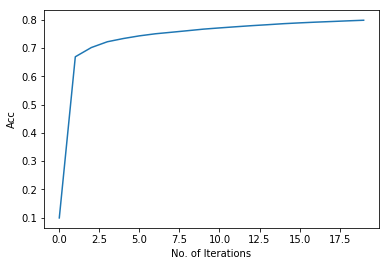

In [61]:
from matplotlib import pyplot as plt
plt.plot( acc)
#plt.plot( L_Erms_Val, label = 'Validation')
#plt.plot( L_Erms_Test, label = 'Testing')
#plt.legend()
plt.ylabel('Acc')
plt.xlabel('No. of Iterations')
plt.show()

In [62]:
#plotting graphs for Lamda chance

x = x_train
w = np.zeros([x.shape[1],len(np.unique(y))])
lam = 1
#lams = [0.1,0.5,1,5,10]
lams = [0.01,0.05,0.1,0.2,0.5,1]
iterations = 20
learningRate = 0.1
losses = []
acc = []
acc_mnist = []
acc_usps = []
for lam in lams:
    for i in range(0,iterations):
        loss,grad = getLoss(w,x,y,lam)
        w = w - (learningRate * grad)
    losses.append(loss)
    acc.append(getAccuracy(x,y))
    acc_mnist.append(getAccuracy(x_test,y_test))
    acc_usps.append(getAccuracy(USPSMat,USPSTar))

In [63]:
acc

[0.80188, 0.82886, 0.83936, 0.84242, 0.82758, 0.7924]

In [64]:
losses

[1.2418599273036133,
 1.0513734305533018,
 1.1305318256488048,
 1.3641225261838297,
 1.7124430557360102,
 1.9209512251948009]

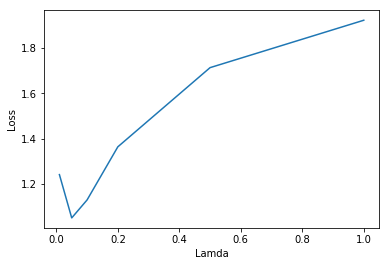

In [65]:
plt.plot([0.01,0.05,0.1,0.2,0.5,1], losses)
#plt.plot([1,2,3,4,5,6,7,8,9,10], ValErms, label = 'Validation')
#plt.plot([1,2,3,4,5,6,7,8,9,10], TestErms, label = 'Testing')
#plt.legend()
plt.ylabel('Loss')
plt.xlabel('Lamda')
plt.show()

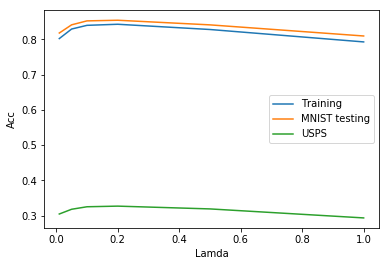

In [66]:
plt.plot([0.01,0.05,0.1,0.2,0.5,1], acc, label='Training')
plt.plot([0.01,0.05,0.1,0.2,0.5,1], acc_mnist, label = 'MNIST testing')
plt.plot([0.01,0.05,0.1,0.2,0.5,1], acc_usps, label = 'USPS')
#plt.plot([1,2,3,4,5,6,7,8,9,10], ValErms, label = 'Validation')
#plt.plot([1,2,3,4,5,6,7,8,9,10], TestErms, label = 'Testing')
plt.legend()
plt.ylabel('Acc')
plt.xlabel('Lamda')
plt.show()

### 4.1 Prediction for MNIST test data

In [67]:
probs_mnist, preds_mnist = getProbsAndPreds(x_test)

In [68]:
preds_mnist

array([7, 2, 1, ..., 4, 8, 6])

In [69]:
cm_log_mnist = confusion_matrix(y_test,preds_mnist)

In [70]:
print("Confusion Matrix for MNIST test data with Logistic Regression:")
print(" ")
print(cm_log_mnist)

Confusion Matrix for MNIST test data with Logistic Regression:
 
[[ 947    0    3    5    0    0   17    1    7    0]
 [   0 1088    9    6    0    0    4    1   27    0]
 [  39   51  794   37   14    0   35   21   39    2]
 [   9    7   24  900    0    2    9   19   29   11]
 [   8   16    5    1  798    0   33    2   19  100]
 [  89   43   10  259   20  282   51   28   76   34]
 [  43   15   16    2    5    4  870    0    3    0]
 [  11   52   27    0    8    0    4  884   11   31]
 [  25   39   13  102    7    1   22   18  727   20]
 [  31   22   13   17   52    0    3   53   16  802]]


In [71]:
print("Accuracy for MNIST test data with Logistic Regression:")
print(calcAccWithCM(cm_log_mnist))

Accuracy for MNIST test data with Logistic Regression:
80.92


### 4.2 Prediction for USPS data

In [72]:
print ('Test Accuracy: ', getAccuracy(USPSMat,USPSTar))

Test Accuracy:  0.2937146857342867


In [73]:
probs_usps, preds_usps = getProbsAndPreds(USPSMat)

In [74]:
preds_usps

array([0, 0, 0, ..., 7, 7, 3])

In [75]:
cm_log_usps = confusion_matrix(USPSTar, preds_usps)

In [76]:
print("Confusion Matrix for USPS data with Logistic Regression:")
print(" ")
print(cm_log_usps)

Confusion Matrix for USPS data with Logistic Regression:
 
[[ 972    9  359   58  318    4   50   27   48  155]
 [ 363  313  219  222  148    3   52  379  292    9]
 [ 491   61 1001  110   50    1  110   95   71    9]
 [ 379    8  132 1113   43   15   62   84  120   44]
 [ 339  111   51   87  948   11   30  144  215   64]
 [ 578   50  247  405   44  217  164   98  148   49]
 [ 869   18  315   86   90    4  538   22   40   18]
 [ 302  290  388  357   49   11   60  265  248   30]
 [ 537   80  253  245  136   53  170   46  429   51]
 [ 203  286  187  421  148    3   27  364  283   78]]


In [77]:
print("Accuracy for USPS data with Logistic Regression:")
print(calcAccWithCM(cm_log_usps))

Accuracy for USPS data with Logistic Regression:
29.371468573428672


# 5. Ensemble

## 5.1 For MNIST test data

In [88]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
f.close()

In [89]:
x_train,y_train = training_data
x_test, y_test = test_data
x_val, y_val = validation_data

In [90]:
"""
y_pred_nw_mnist
y_pred_svm_mnist
y_pred_rm_mnist
preds_mnist
"""
#y_pred_ensemble
pred_combined= np.vstack((np.vstack((np.vstack((y_pred_nw_mnist,y_pred_svm_mnist)),y_pred_rm_mnist)),preds_mnist))

In [91]:
pred_combined

array([[7, 2, 1, ..., 4, 5, 6],
       [7, 2, 1, ..., 4, 5, 6],
       [7, 2, 1, ..., 4, 5, 6],
       [7, 2, 1, ..., 4, 8, 6]])

In [92]:
# Majority Voting
y_pred_ensemble, vote_count =np.array(stats.mode(pred_combined))

In [93]:
y_pred_ensemble

array([[7, 2, 1, ..., 4, 5, 6]])

#### Confusion matrix

In [94]:
cm_en_mnist = confusion_matrix(y_test,y_pred_ensemble.T)

In [95]:
print("Confusion Matrix for MNIST test data with majority voting of classifiers:")
print(" ")
print(cm_en_mnist)

Confusion Matrix for MNIST test data with majority voting of classifiers:
 
[[ 970    0    0    1    0    3    3    1    2    0]
 [   0 1123    2    2    0    1    3    1    3    0]
 [  13    7  952    8    8    0   14   11   17    2]
 [   3    1   16  961    0    6    1    9   10    3]
 [   1    2    4    0  943    0    7    1    2   22]
 [  10    5    3   48   11  786   11    3   10    5]
 [  16    3    4    1    8   10  916    0    0    0]
 [   5   16   21    3    8    0    0  958    4   13]
 [  10    9    7   22    7   18   13    9  870    9]
 [  14    7    3   13   37    3    0   16    4  912]]


In [96]:
print("Accuracy for MNIST test data with majority voting of classifiers:")
print(calcAccWithCM(cm_en_mnist))

Accuracy for MNIST test data with majority voting of classifiers:
93.91000000000001


## 5.2 For USPS data

In [97]:
"""
np.argmax(y_prob_nw_USPS, axis=1)
y_pred_svm_USPS

y_pred_rm_usps
preds_usps
"""
y_pred_nw_USPS = np.argmax(y_prob_nw_USPS, axis=1)
pred_combined_usps = np.vstack((np.vstack((np.vstack((y_pred_nw_USPS,y_pred_svm_USPS)),y_pred_rm_usps)),preds_usps))

In [98]:
pred_combined_usps

array([[0, 0, 0, ..., 7, 7, 3],
       [0, 0, 0, ..., 9, 7, 3],
       [0, 0, 0, ..., 7, 7, 3],
       [0, 0, 0, ..., 7, 7, 3]])

In [99]:
# Majority Voting
y_pred_ensemble_usps, vote_count_usps =np.array(stats.mode(pred_combined_usps))

#### Confusion matrix

In [100]:
cm_en_usps = confusion_matrix(USPSTar,y_pred_ensemble_usps.T)

In [101]:
print("Confusion Matrix for USPS data with majority voting of classifiers:")
print(" ")
print(cm_en_usps)

Confusion Matrix for USPS data with majority voting of classifiers:
 
[[ 774    5  369   47  367   95   52   32   10  249]
 [ 194  469  223  202  195   86   32  533   61    5]
 [ 268   33 1301   87   44   96   46   90   27    7]
 [ 125    4  137 1377   17  210    5   75   32   18]
 [  75  117   57   40 1178  158   18  204   93   60]
 [ 230   34  208  214   38 1139   57   59   17    4]
 [ 519   18  375   55  102  189  692   19   13   18]
 [ 157  310  394  375   49  180   14  419   82   20]
 [ 204   44  204  245  124  754   88   46  258   33]
 [  71  239  198  404  174  107    8  474  199  126]]


In [102]:
print("Accuracy for USPS data with majority voting of classifiers:")
print(calcAccWithCM(cm_en_usps))

Accuracy for USPS data with majority voting of classifiers:
38.666933346667335
